# **Task - 1:**

Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

• Use Data Augmentation to increase the number of training image.

• Use deeper model with BN and DropOut layer as presented above.

• Understand the Model Summary and Training Behavior.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#train image data
train_df = "/content/drive/MyDrive/Colab Notebooks/AI and Machine Learning/Week-6/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/Colab Notebooks/AI and Machine Learning/Week-6/FruitinAmazon/test"

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
import os
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_df))

if not class_names:
    print("No class directories found in the train folder!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [ ]:
from PIL import Image, UnidentifiedImageError
corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



No corrupted images found.


In [ ]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [ ]:
selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

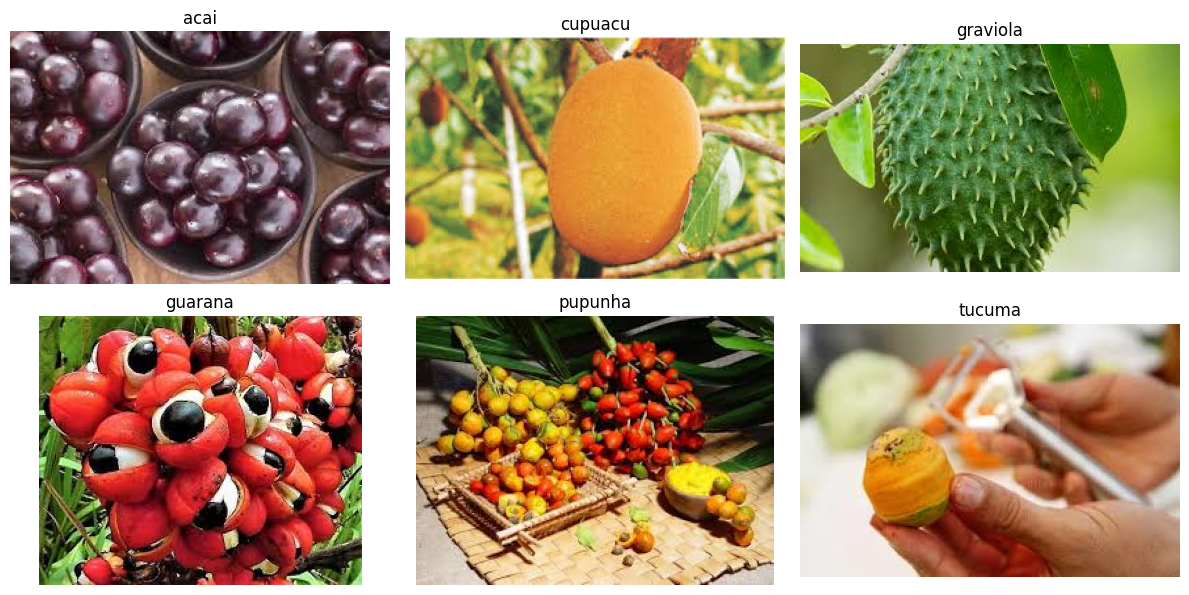

In [ ]:
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()

In [ ]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.2708 - loss: 86.5739

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2656 - loss: 96.0829 - val_accuracy: 0.1667 - val_loss: 114.3911
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.1192 - loss: 118.4860

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1241 - loss: 114.4986 - val_accuracy: 0.1667 - val_loss: 28.8733
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.1406 - loss: 27.3072

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 785ms/step - accuracy: 0.1367 - loss: 27.2985 - val_accuracy: 0.0556 - val_loss: 15.5118
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.2951 - loss: 10.9228

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 566ms/step - accuracy: 0.2943 - loss: 10.6317 - val_accuracy: 0.2222 - val_loss: 5.4411
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.4439 - loss: 2.5504

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 0.4510 - loss: 2.4866 - val_accuracy: 0.2778 - val_loss: 3.4108
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.5538 - loss: 1.1481

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 872ms/step - accuracy: 0.5612 - loss: 1.1301 - val_accuracy: 0.3889 - val_loss: 2.9041
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.7442 - loss: 0.8852

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7491 - loss: 0.8758 - val_accuracy: 0.3333 - val_loss: 2.8613
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 816ms/step - accuracy: 0.8828 - loss: 0.6331 - val_accuracy: 0.3333 - val_loss: 3.0452
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.8524 - loss: 0.4618 - val_accuracy: 0.3889 - val_loss: 3.6577
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 620ms/step - accuracy: 0.9497 - loss: 0.1752 - val_accuracy: 0.2778 - val_loss: 3.7026
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 769ms/step - accuracy: 0.9813 - loss: 0.0551 - val_accuracy: 0.3333 - val_loss: 3.4418
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step - accuracy: 1.0000 - loss: 0.0236 - val_accuracy: 0.3889 - val_loss: 3.8101
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.2778 - val_loss: 4.0999
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.3333 - val_loss: 4

In [ ]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.3333 - loss: 2.8613
Test Accuracy: 0.3333
Test Loss: 2.8613


In [ ]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
              precision    recall  f1-score   support

        acai       0.33      1.00      0.50         3
     cupuacu       0.00      0.00      0.00         4
    graviola       0.00      0.00      0.00         1
     guarana       0.50      0.33      0.40         3
     pupunha       0.29      0.50      0.36         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.33        18
   macro avg       0.19      0.31      0.21        18
weighted avg       0.20      0.33      0.23        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [ ]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1279 - loss: 2.5724

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.1411 - loss: 2.5394 - val_accuracy: 0.1667 - val_loss: 1.7874
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3501 - loss: 1.7244

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3494 - loss: 1.7302 - val_accuracy: 0.2778 - val_loss: 1.7761
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4744 - loss: 1.2257 - val_accuracy: 0.2222 - val_loss: 1.8007
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4931 - loss: 1.3570 - val_accuracy: 0.2222 - val_loss: 1.8738
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6671 - loss: 1.0021 - val_accuracy: 0.2222 - val_loss: 1.9577
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6124 - loss: 1.0046 - val_accuracy: 0.2222 - val_loss: 2.0185
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6211 - loss: 0.9530 - val_accuracy: 0.2222 - val_loss: 2.1174
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6445 - loss: 0.8536 - val_accuracy: 0.2222 - val_loss: 2.2916
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7205 - loss: 0.8353 - val_accuracy: 0.2222 - val_loss: 2.4730
Epoch 10/50
3/3 ━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task - 2:**

To - Do:

• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.

• Evaluate the model’s performance and generate an inference output and classification report.

• Did the performance improved compared to training from scratch.

Expected Deliverables:

• Trained Model: A trained model with the frozen layers and fine-tuned output layer.

• Inference Output: Predicted class labels for the validation dataset.

• Classification Report: A detailed classification report showing the performance of the model for
each class.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet',  # Fixed quotes from curly to straight
                  include_top=False,
                  input_shape=(128, 128, 3))  # Input shape for VGG16


In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
x = Dense(512, activation='relu')(x)  # Added another dense layer
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model - CHANGED to sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
             loss='sparse_categorical_crossentropy',  # Changed from categorical
             metrics=['accuracy'])
# Callbacks
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1956 - loss: 12.4141

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.1918 - loss: 12.2440 - val_accuracy: 0.0556 - val_loss: 5.8026
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1597 - loss: 13.0609

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.1615 - loss: 12.9717 - val_accuracy: 0.0556 - val_loss: 5.1898
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2054 - loss: 12.5478

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.2027 - loss: 12.6109 - val_accuracy: 0.1111 - val_loss: 4.8128
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1846 - loss: 11.1863

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.1871 - loss: 11.2467 - val_accuracy: 0.1111 - val_loss: 4.5722
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1788 - loss: 9.7865 

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.1862 - loss: 9.6395 - val_accuracy: 0.1111 - val_loss: 4.3227
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4248 - loss: 5.5613

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.4262 - loss: 5.5481 - val_accuracy: 0.1111 - val_loss: 3.9709
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3299 - loss: 8.8415

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.3307 - loss: 8.7800 - val_accuracy: 0.1111 - val_loss: 3.4112
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3264 - loss: 7.5486

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.3177 - loss: 7.6373 - val_accuracy: 0.3333 - val_loss: 2.8989
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3050 - loss: 7.4165

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3051 - loss: 7.3421 - val_accuracy: 0.3333 - val_loss: 2.5300
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3495 - loss: 7.7836  

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 9s/step - accuracy: 0.3524 - loss: 7.7069 - val_accuracy: 0.3333 - val_loss: 2.3187
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3385 - loss: 5.9273

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3477 - loss: 5.8981 - val_accuracy: 0.3889 - val_loss: 2.1928
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3900 - loss: 5.1795

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.3898 - loss: 5.1736 - val_accuracy: 0.5000 - val_loss: 2.0462
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3935 - loss: 7.6517

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.4028 - loss: 7.4243 - val_accuracy: 0.5000 - val_loss: 1.9372
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3738 - loss: 7.2167

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3811 - loss: 7.1784 - val_accuracy: 0.5556 - val_loss: 1.7912
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5405 - loss: 5.1210

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.5373 - loss: 5.0819 - val_accuracy: 0.6667 - val_loss: 1.6906
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5093 - loss: 4.1516

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.5139 - loss: 4.0854 - val_accuracy: 0.6667 - val_loss: 1.6867
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.6250 - loss: 3.7141 - val_accuracy: 0.6667 - val_loss: 1.7048
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.5994 - loss: 3.6874 - val_accuracy: 0.6667 - val_loss: 1.7430
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5573 - loss: 3.9592 - val_accuracy: 0.6111 - val_loss: 1.9104
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.6428 - loss: 2.8572 - val_accuracy: 0.6111 - val_loss: 2.1216
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.6211 - loss: 2.3575 - val_accuracy: 0.6111 - val_loss: 2.4021
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6667 - loss: 1.6867
Transfer Learning Model Accuracy: 0.6667
Transfer Learning Model Loss: 1.6867

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.33  

In [ ]:
from sklearn.metrics import classification_report

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

# 2. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# 3. Build Transfer Learning Model
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)  # Resize to VGG16 expected input

# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# 4. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 5. Train the Model
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# 7. Generate Classification Report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1296 - loss: 1.9730 

3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 22s/step - accuracy: 0.1319 - loss: 1.9696 - val_accuracy: 0.0556 - val_loss: 1.9539
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1209 - loss: 2.0129 

3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 17s/step - accuracy: 0.1150 - loss: 2.0214 - val_accuracy: 0.0556 - val_loss: 1.9202
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.1493 - loss: 1.9204 

3/3 ━━━━━━━━━━━━━━━━━━━━ 61s 21s/step - accuracy: 0.1536 - loss: 1.9158 - val_accuracy: 0.0556 - val_loss: 1.8875
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2257 - loss: 1.9835 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 21s/step - accuracy: 0.2214 - loss: 1.9895 - val_accuracy: 0.1111 - val_loss: 1.8602
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2951 - loss: 1.9188 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 21s/step - accuracy: 0.2943 - loss: 1.9098 - val_accuracy: 0.0556 - val_loss: 1.8391
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2662 - loss: 1.7147 

3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 17s/step - accuracy: 0.2587 - loss: 1.7268 - val_accuracy: 0.0556 - val_loss: 1.8264
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.1348 - loss: 2.0035 

3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 21s/step - accuracy: 0.1359 - loss: 1.9988 - val_accuracy: 0.0556 - val_loss: 1.8146
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1863 - loss: 1.8519 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 21s/step - accuracy: 0.1780 - loss: 1.8651 - val_accuracy: 0.0556 - val_loss: 1.8007
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1250 - loss: 1.8640 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 22s/step - accuracy: 0.1250 - loss: 1.8603 - val_accuracy: 0.0556 - val_loss: 1.7900
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1800 - loss: 1.8702 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 17s/step - accuracy: 0.1801 - loss: 1.8641 - val_accuracy: 0.0556 - val_loss: 1.7826
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2558 - loss: 1.7319 

3/3 ━━━━━━━━━━━━━━━━━━━━ 60s 21s/step - accuracy: 0.2509 - loss: 1.7425 - val_accuracy: 0.0556 - val_loss: 1.7743
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1389 - loss: 1.7541 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.1458 - loss: 1.7577 - val_accuracy: 0.1111 - val_loss: 1.7651
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1794 - loss: 1.8974 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 17s/step - accuracy: 0.1832 - loss: 1.8807 - val_accuracy: 0.1111 - val_loss: 1.7544
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3310 - loss: 1.7155 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 17s/step - accuracy: 0.3247 - loss: 1.7184 - val_accuracy: 0.1667 - val_loss: 1.7447
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1447 - loss: 1.8837 

3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 16s/step - accuracy: 0.1467 - loss: 1.8830 - val_accuracy: 0.1667 - val_loss: 1.7353
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2297 - loss: 1.7153 

3/3 ━━━━━━━━━━━━━━━━━━━━ 85s 16s/step - accuracy: 0.2313 - loss: 1.7150 - val_accuracy: 0.2222 - val_loss: 1.7246
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2946 - loss: 1.7345 

3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 16s/step - accuracy: 0.2973 - loss: 1.7275 - val_accuracy: 0.3889 - val_loss: 1.7143
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2541 - loss: 1.6327 

3/3 ━━━━━━━━━━━━━━━━━━━━ 90s 17s/step - accuracy: 0.2600 - loss: 1.6239 - val_accuracy: 0.3889 - val_loss: 1.7051
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2992 - loss: 1.6745 

3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 16s/step - accuracy: 0.3043 - loss: 1.6688 - val_accuracy: 0.4444 - val_loss: 1.6986
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2847 - loss: 1.7111 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 16s/step - accuracy: 0.2865 - loss: 1.7136 - val_accuracy: 0.4444 - val_loss: 1.6951
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3449 - loss: 1.6212 

3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 21s/step - accuracy: 0.3455 - loss: 1.6244 - val_accuracy: 0.4444 - val_loss: 1.6941
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3345 - loss: 1.5884 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.3377 - loss: 1.5889 - val_accuracy: 0.4444 - val_loss: 1.6908
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2332 - loss: 1.6766 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 21s/step - accuracy: 0.2444 - loss: 1.6738 - val_accuracy: 0.3889 - val_loss: 1.6889
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4751 - loss: 1.5267 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.4744 - loss: 1.5272 - val_accuracy: 0.3889 - val_loss: 1.6841
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3657 - loss: 1.5778 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 21s/step - accuracy: 0.3611 - loss: 1.5854 - val_accuracy: 0.4444 - val_loss: 1.6801
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 17s/step - accuracy: 0.3207 - loss: 1.6564 - val_accuracy: 0.3889 - val_loss: 1.6803
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 16s/step - accuracy: 0.3494 - loss: 1.5676 - val_accuracy: 0.3889 - val_loss: 1.6830
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.3238 - loss: 1.6008 - val_accuracy: 0.3889 - val_loss: 1.6838
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 16s/step - accuracy: 0.4106 - loss: 1.6376 - val_accuracy: 0.3889 - val_loss: 1.6842
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 16s/step - accuracy: 0.4891 - loss: 1.4703 - val_accuracy: 0.3333 - val_loss: 1.6827
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.4444 - loss: 1.6801

Transfer Learning Model Accuracy: 0.4444
Transfer Learning Model Loss: 1.6801



Classification Report:
              precision    recall  f1-score   support

        acai       0.33      0.33      0.33         3
     cupuacu       0.67      0.50      0.57         4
    graviola       0.17      1.00      0.29         1
     guarana       0.67      0.67      0.67         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.67      0.67      0.67         3

    accuracy                           0.44        18
   macro avg       0.42      0.53      0.42        18
weighted avg       0.44      0.44      0.42        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
